In [1]:
# resources
import sys
sys.path.append("../../py/")
from spacecraft import spacecraft
from indirect.leg import leg
import numpy as np
import PyKEP as pk
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# instantiate spacecraft
sc = spacecraft()

In [3]:
# instantiate indirect leg
leg = leg(sc)

In [4]:
# example departure state
t0 = 5000*24*60*60 #[s]
p0 = pk.planet.jpl_lp("earth")
r0, v0 = np.asarray(p0.eph(t0/60/60/24))

# example arrival state
tf = 6300*24*60*60
pf = pk.planet.jpl_lp("mars")
rf, vf = np.asarray(pf.eph(tf/60/60/24))

# example random standar normal departure costates
l0 = np.random.randn(7)*100

In [5]:
# set indirect leg
leg.set(t0, r0, v0, l0, tf, rf, vf)

print("Departure Time = " + str(t0) + " [s]")
print("Departure Position =\n" + str(r0) + " [m]")
print("Departure Velocity =\n" + str(v0) + " [m/s]")
print("Departure Costates =\n" + str(l0) + " [nd]")

print("Arrival Time = " + str(tf) + " [s]")
print("Arrival Position =\n" + str(rf) + " [m]")
print("Arroval Velocity =\n" + str(vf) + " [m/s]")

Departure Time = 432000000 [s]
Departure Position =
[  1.46398204e+11  -3.56954023e+10   1.11357715e+06] [m]
Departure Velocity =
[  6.57158897e+03   2.88291565e+04  -8.99373252e-01] [m/s]
Departure Costates =
[ 192.3644748   -90.17813008  204.45697745 -115.47799823 -200.1271584
 -123.54836839  -19.72393494] [nd]
Arrival Time = 544320000 [s]
Arrival Position =
[  8.74152244e+10   2.08813662e+11   2.23012312e+09] [m]
Arroval Velocity =
[-21431.32704563  11417.29391205    765.19337599] [m/s]


In [6]:
# propagate trajectory
leg.propagate(atol=1e-5, rtol=1e-5, npts=100)

print("Trajectory History: \n[m, m, m, m/s, m/s, m/s, kg, nd, nd, nd, nd, nd, nd, nd]")
print(str(leg.trajectory))

print("Trajectory Times: [s]")
print(str(leg.t))

Trajectory History: 
[m, m, m, m/s, m/s, m/s, kg, nd, nd, nd, nd, nd, nd, nd]
[[  9.78611548e-01  -2.38609027e-01   7.44380350e-06 ...,  -2.00127158e+02
   -1.23548368e+02  -1.97239349e+01]
 [  1.00362666e+00  -1.58351685e-02   5.05262638e-06 ...,  -1.73836921e+02
   -1.66265096e+02  -1.97462343e+01]
 [  9.78225567e-01   2.07724864e-01   1.33889753e-05 ...,  -1.38972057e+02
   -2.00624384e+02  -1.97747465e+01]
 ..., 
 [ -8.08346136e-01  -5.16405209e-01   6.76703079e-04 ...,  -2.23620947e+03
    2.24924361e+02  -6.99286046e+01]
 [ -6.62961872e-01  -6.92345726e-01  -7.82854232e-06 ...,  -1.84295744e+03
    2.31054364e+02  -7.09311452e+01]
 [ -4.79408512e-01  -8.28288433e-01  -7.00541639e-04 ...,  -1.38275065e+03
    2.23859440e+02  -7.18722362e+01]]
Trajectory Times: [s]
[  86.0104909    86.23637703   86.46226317   86.68814931   86.91403545
   87.13992159   87.36580772   87.59169386   87.81758      88.04346614
   88.26935227   88.49523841   88.72112455   88.94701069   89.17289682
   89.3

In [7]:
# get mismatch equality constraints
ceq = leg.mismatch_constraints(atol=1e-5, rtol=1e-5, npts=1000)

print("Mismatch Equality Constraints:\n[xf, yf, zf, vxf, vyf, vzf, lmf]")
print(str(ceq))

Mismatch Equality Constraints:
[xf, yf, zf, vxf, vyf, vzf, lmf]
[ -1.06372894e+00  -2.22412230e+00  -1.56081621e-02   1.60187418e+00
  -8.83820613e-01  -2.87170468e-02  -7.18774126e+01]


In [8]:
# parametres
atol = 1e-12
rtol = 1e-12
npts = 20000

# unbounded quadratic control trajectory
leg.dynamics.alpha = 0
leg.dynamics.bound = False
ubqct = leg.get_trajectory(atol=atol, rtol=rtol, npts=npts)

# bounded quadratic control trajectory
leg.dynamics.bound = True
qct = leg.get_trajectory(atol=atol, rtol=rtol, npts=npts)

# mass optimal control trajectory
leg.dynamics.alpha = 1
mct = leg.get_trajectory(atol=atol, rtol=rtol, npts=npts)

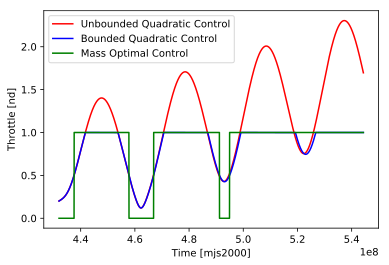

In [9]:
plt.figure()
plt.plot(ubqct[:,0], ubqct[:,15], 'r-')
plt.plot(qct[:,0], qct[:,15], 'b-')
plt.plot(mct[:,0], mct[:,15], 'g-')
plt.ylabel("Throttle [nd]")
plt.xlabel("Time [mjs2000]")
plt.legend(["Unbounded Quadratic Control", "Bounded Quadratic Control", "Mass Optimal Control"])
plt.show()